## Privacy-preserving techniques (PPTs)

The main challenge of de-identiication is to discover how to release data that is useful for accurate decisions without disclosing sensitive information on specific data subjects. We will explore the techniques that reduce the disclosure risk and still allow us to perform statistical analysis and data mining tasks.
You will learn:
- different categories of PPTs
- how to apply PPTs
- impact analysis

### Categories of PPTs


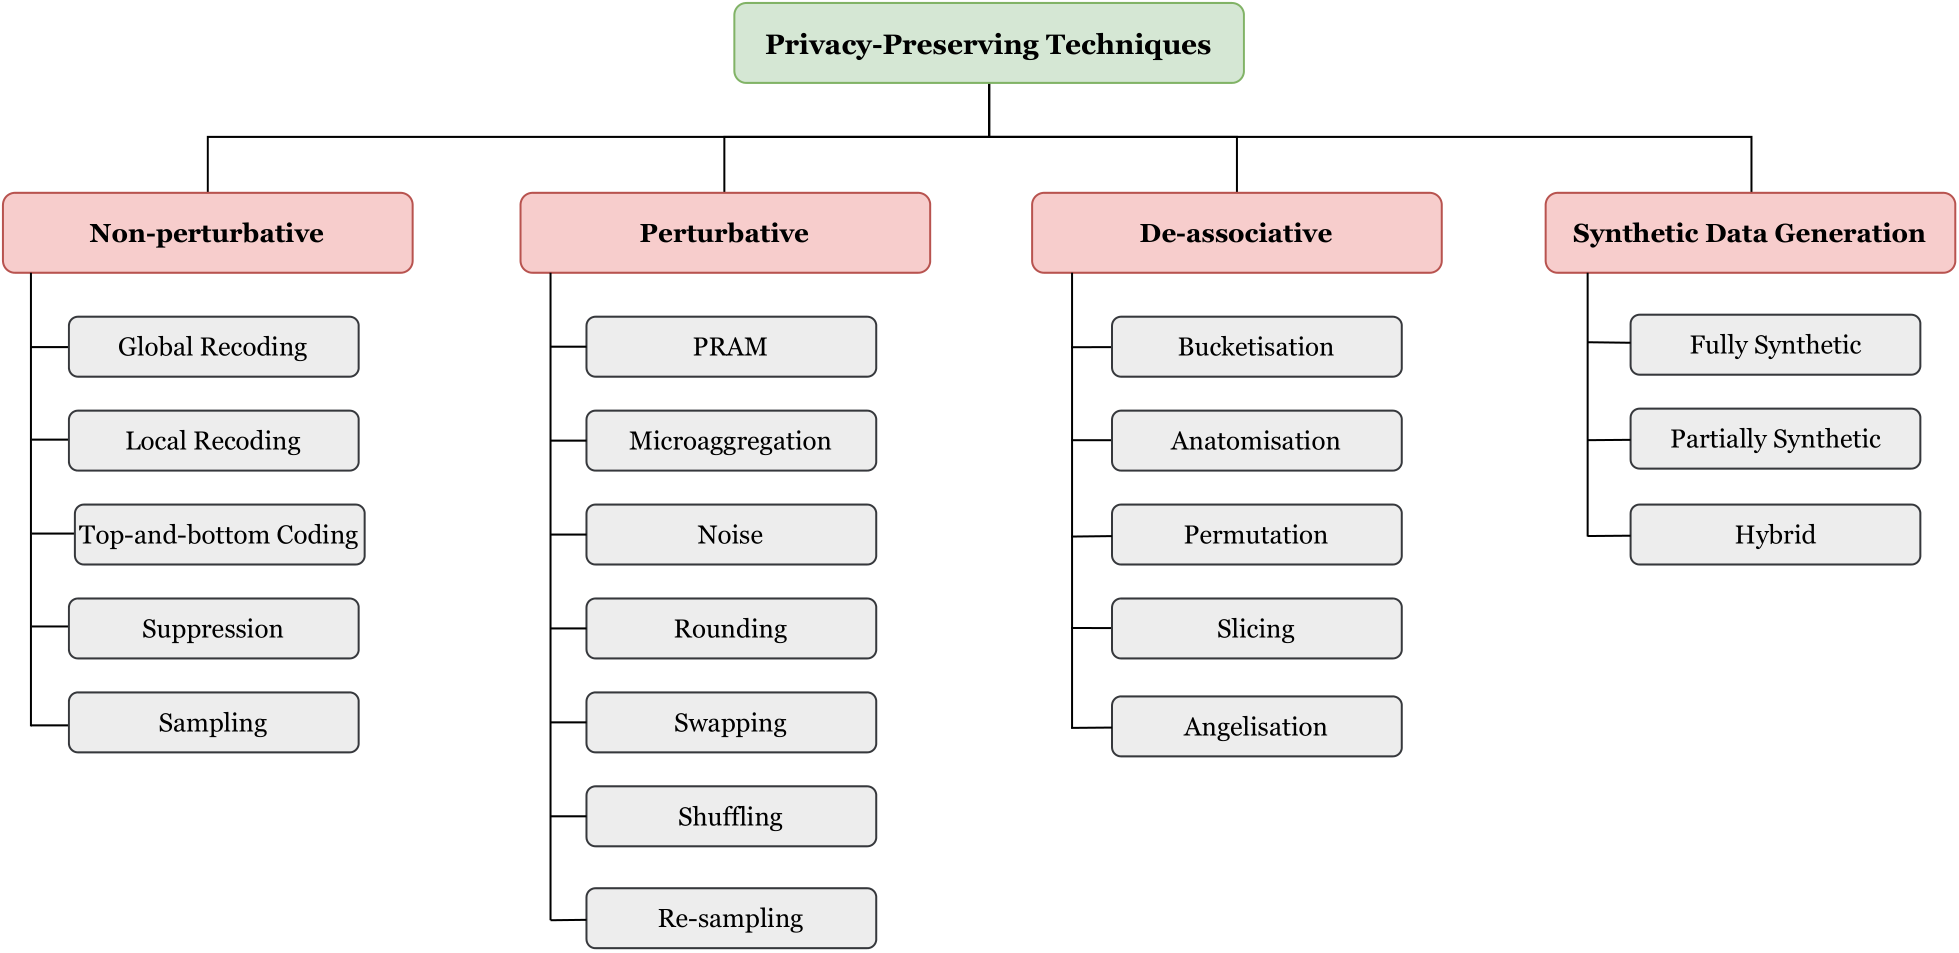

- **Non-perturbative**: involves the reduction of detail or suppression of information;

- **Perturbative**: distortion of information;

- **De-associative**: break the relationship between QI and sensitive attributes, either by permuting the sensitive values or releasing two separate tables (QI attributes table and a sensitive table);

- **Synthetic data**: generation of artiicial data based on original data by preserving the properties and characteristics of the original data.

The choice of PPTs is based on the need for data protection determined by the disclosure risk and structure of data. In the following example, to acheieve 4-anonymous data set, it was applied **generalization** and **suppression**.

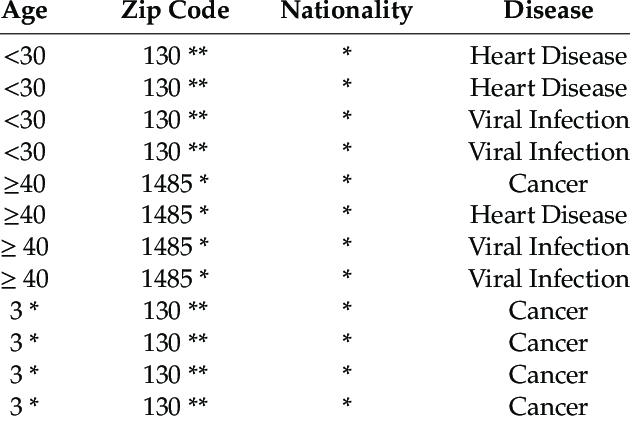

### PPTs application


We will focus on **non-perturbative techniques**, as these are the most common and aim to guarantee the **truthfulness** of data.

In [241]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
# Read csv file into a pandas dataframe
data = pd.read_csv("students-performance.csv")

In [243]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,High
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,High
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,High
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,High
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,High


Analyze each attribute individually to apply the best parameters for transformations.

In [244]:
# Compute percentage of age
age_per = round((data['age'].value_counts()/data['age'].count())*100,2)

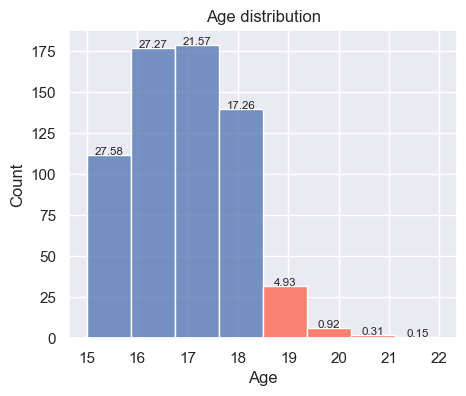

In [245]:
# Histplot of age
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(5, 4))
ax = sns.histplot(data, x="age", bins=8)
ax.set_xlabel('Age')
ax.set_title('Age distribution')
# identify the potential ages at risk
ax.patches[4].set_facecolor('salmon')
ax.patches[5].set_facecolor('salmon')
ax.patches[6].set_facecolor('salmon')
ax.patches[7].set_facecolor('salmon')
sns.set(font_scale=0.7)
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        age_per.to_list()[i],ha="center")
    i += 1
plt.show()

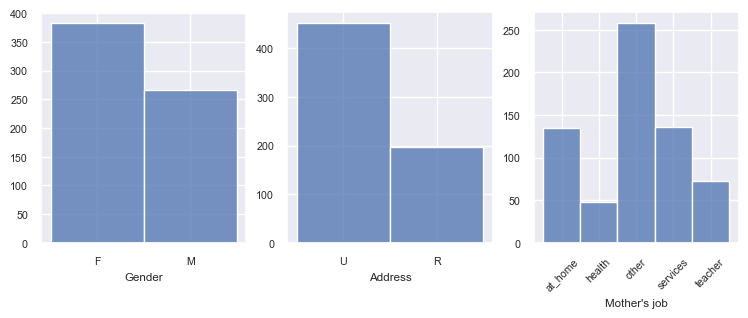

In [246]:
# Histplot for all categorical QI
fig, axes = plt.subplots(1, 3, figsize=(9,3))
sns.histplot(ax=axes[0],data=data, x="sex")
sns.histplot(ax=axes[1],data=data, x="address")
sns.histplot(ax=axes[2],data=data, x="Mjob")
axes[0].set_xlabel("Gender")
axes[1].set_xlabel("Address")
axes[2].set_xlabel("Mother's job")
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
plt.xticks(rotation=45)
plt.show()

Find the k-anonymity for these QIs!

In [247]:
# Define function to calculate the percentage of single outs concerning the selected QIs
def identity_risk(qi, data):
    fk = data.groupby(qi)[qi[0]].transform('size')
    print('risk = ' + str(round((sum([i for i in fk if i==1]) * 100) / len(data),2))+ '%; fk1 = ' + str(sum([i for i in fk if i==1])))

In [248]:
# Simulate scenarios assuming that an intruder may know (at maximum) information on gender, age, address and mother's job
identity_risk(['age', 'sex'], data)

risk = 0.46%; fk1 = 3


In [249]:
identity_risk(['age', 'sex', 'address'], data)

risk = 0.77%; fk1 = 5


In [250]:
identity_risk(['age', 'sex', 'address', 'Mjob'], data)

risk = 3.08%; fk1 = 20


In [251]:
identity_risk(['sex', 'address', 'Mjob'], data)

risk = 0.0%; fk1 = 0


*Age* is the attribute that contributes to a higher risk 🚩🚩

In [252]:
data_transf = data.copy()

In [253]:
# Apply generalization (global recoding) of range 2 -- due to the small interval on this attribute
bins = list(range(min(data_transf['age']-2), max(data_transf['age']) + 2, 2))
# labels = ['({}, {}]'.format(bins[i-1], bins[i]) for i in range(1, len(bins))]
labels = ['%d' % bins[i] for i in range(0, len(bins) - 1)]
lab = pd.cut(data_transf['age'], bins=bins, labels=labels, include_lowest=True).astype(int)
for i in range(0, len(data_transf)):
    data_transf.loc[i, 'age2'] = int(lab[i])

In [254]:
data_transf[['age', 'age2']].describe()

,age,age2
count,649.000000,649.000000
mean,16.744222,15.243451
std,1.218138,1.395282
min,15.000000,13.000000
25%,16.000000,15.000000
50%,17.000000,15.000000
75%,18.000000,17.000000
max,22.000000,21.000000


The transformed *age* presents similar statistical information.

### Transformation analysis

In [255]:
identity_risk(['age2', 'sex'], data_transf)

risk = 0.15%; fk1 = 1


In [256]:
identity_risk(['age2', 'sex', 'address'], data_transf)

risk = 0.31%; fk1 = 2


In [257]:
identity_risk(['age2', 'sex', 'address', 'Mjob'], data_transf)

risk = 1.69%; fk1 = 11


In [258]:
# Analyze the single case in age and sex
data_transf.loc[(data_transf.groupby(['age2', 'sex']).transform('size')==1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,class,age2
279,GP,M,22,U,GT3,T,3,1,services,services,...,4,5,5,5,1,12,7,8,Low,21.0


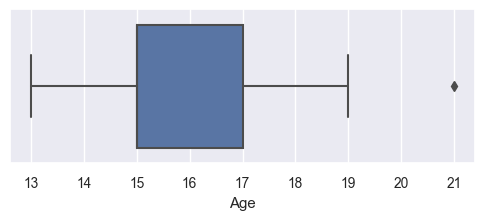

In [259]:
# Boxplot of Age
fig = plt.figure(figsize=(6, 2))
sns.set_theme(style="whitegrid")
sns.set(font_scale=0.9)
ax = sns.boxplot(x=data_transf["age2"])
ax.set_xlabel('Age')
plt.show()

In [260]:
# Apply top-and-bottom coding to obfuscate the outlier
data_transf['age2'] = np.where(data_transf['age2']==21, 19, data_transf['age2'])

In [261]:
identity_risk(['age2', 'sex'], data_transf)

risk = 0.0%; fk1 = 0


In [262]:
identity_risk(['age2', 'sex', 'address'], data_transf)

risk = 0.0%; fk1 = 0


In [263]:
identity_risk(['age2', 'sex', 'address', 'Mjob'], data_transf)

risk = 1.39%; fk1 = 9


In [264]:
# Analyze the single cases for all QIs
data_transf.loc[(data_transf.groupby(['age2', 'sex', 'address', 'Mjob']).transform('size')==1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,class,age2
32,GP,M,15,R,GT3,T,4,3,teacher,at_home,...,5,2,1,1,5,0,13,14,High,13.0
68,GP,F,15,R,LE3,T,2,2,health,services,...,1,3,1,3,4,0,11,10,High,13.0
400,GP,M,18,R,GT3,T,4,3,teacher,services,...,3,2,1,2,4,4,15,14,High,17.0
413,GP,M,21,R,LE3,T,1,1,at_home,other,...,3,3,5,2,4,21,9,10,High,19.0
433,MS,F,15,R,GT3,T,4,4,teacher,other,...,5,1,3,5,5,0,13,14,High,13.0
446,MS,M,15,U,LE3,T,3,3,at_home,at_home,...,3,3,1,1,5,0,11,11,High,13.0
506,MS,F,20,U,GT3,T,3,3,at_home,services,...,3,4,2,4,3,8,11,9,High,19.0
543,MS,M,17,R,GT3,T,4,4,health,other,...,3,3,1,3,5,2,9,9,Low,15.0
574,MS,M,20,R,GT3,T,1,1,other,other,...,4,3,2,4,4,12,8,11,High,19.0


➡️ With top-and-bottom coding, we reduce the risk to 0% for 3 QIs!!

➡️ As *Mjob* is categorical and we do not have a generalization tree for this QI, a possible solution is to suppress the values for the single out cases.

In [265]:
indexes_to_remove = data_transf.loc[(data_transf.groupby(['age2', 'sex', 'address', 'Mjob']).transform('size')==1)].index

In [266]:
data_transf['Mjob_sup'] = np.where(np.isin(data_transf.index, indexes_to_remove), '*', data_transf['Mjob'])

In [267]:
data_transf['Mjob_sup'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher', '*'],
      dtype=object)

In [268]:
identity_risk(['age2', 'sex', 'address', 'Mjob_sup'], data_transf)

risk = 0.77%; fk1 = 5


In [269]:
data_transf.loc[(data_transf.groupby(['age2', 'sex', 'address', 'Mjob_sup']).transform('size')==1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,class,age2,Mjob_sup
32,GP,M,15,R,GT3,T,4,3,teacher,at_home,...,2,1,1,5,0,13,14,High,13.0,*
400,GP,M,18,R,GT3,T,4,3,teacher,services,...,2,1,2,4,4,15,14,High,17.0,*
446,MS,M,15,U,LE3,T,3,3,at_home,at_home,...,3,1,1,5,0,11,11,High,13.0,*
506,MS,F,20,U,GT3,T,3,3,at_home,services,...,4,2,4,3,8,11,9,High,19.0,*
543,MS,M,17,R,GT3,T,4,4,health,other,...,3,1,3,5,2,9,9,Low,15.0,*


In [270]:
identity_risk(['age2', 'sex', 'address'], data_transf)

risk = 0.0%; fk1 = 0


Although there still appear to be 5 individuals at risk, they are protected! The re-identification risk for *age*, *gender* and *address* is <span style="color:green">**0%**</span> and as *Mjob* is suppressed, adding this attribute does not increase the information that an intruder may acquire.

In [271]:
# To circumvent this, we can replace with NaN instead of *
data_transf['Mjob_sup'] = np.where(np.isin(data_transf.index, indexes_to_remove), np.nan, data_transf['Mjob'])

In [272]:
identity_risk(['age2', 'sex', 'address', 'Mjob_sup'], data_transf)

risk = 0.0%; fk1 = 0


In [273]:
# Assign the frequency of k based on selected QIs
data_transf['fk'] = data_transf.groupby(['age2', 'sex', 'address', 'Mjob_sup']).transform('size')

In [274]:
data_transf.groupby('fk').size().reset_index(name='Count').head()

,fk,Count
0,2.0,8
1,3.0,18
2,4.0,20
3,5.0,15
4,6.0,12


The lowest $k$ is 2, so we have a **2-anonymous** data set!

In [275]:
data['age'] = data_transf['age2']
data['Mjob'] = data_transf['Mjob']

In [278]:
# save the transformed data
data.to_csv('output/2anonymous_students.csv', index=False)